# Machine Learning Notes

In [ ]:
pip install matplotlib

In [ ]:
pip install sklearn

In [ ]:
pip install seaborn

In [9]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import confusion_matrix , classification_report

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import pandas as pd

### Understanding Box (Whisker) Plots

With Box plot you can provide a summary of the distribution, identify potential and compare different datasets in a compact and visual manner.

Using Box plot you can show 5 numbers summary from a dataset. The 5-number summary is the minimum, first quartile, median, third quartile, and maximum.
In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

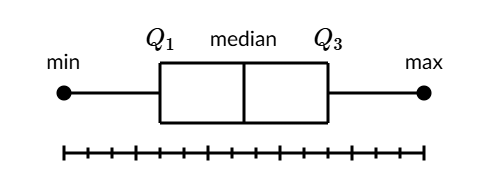

Take an example of a dataset

In [4]:
box_data_list = [25,28,29,29,30,34,35,35,37,38] # make sure it is sorted

media_val = np.median(box_data_list) #find the median value

Q1 = np.percentile(box_data_list, 25) #find the 1st quartile
Q3 = np.percentile(box_data_list, 75) #find the 3rd quartile
min = np.min(box_data_list) #find the minimum value
max = np.max(box_data_list) #find the maximum value

# now we have our all 5 values, now we can print them

box_plot_data = [min, Q1, media_val, Q3, max]
print(box_plot_data)

[25, 29.0, 32.0, 35.0, 38]


{'whiskers': [<matplotlib.lines.Line2D at 0x24143be0dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x24143bea780>,
 'boxes': [<matplotlib.lines.Line2D at 0x24143be0c88>],
 'medians': [<matplotlib.lines.Line2D at 0x24143beae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24143beaef0>],
 'means': []}

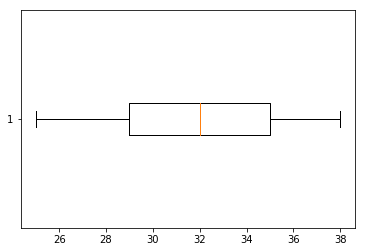

In [10]:
# now we can plot the box plot
plt.boxplot(box_data_list,vert=False)

The five-number summary divides the data into sections that each contain approximately 
\[25\%\] of the data in that set. Now this can be labeled as

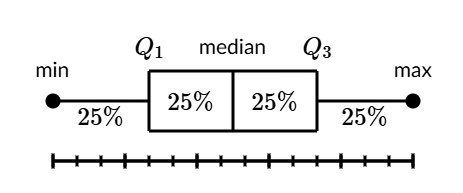

### Confusion Matrix:

**Explanation 1**

This table is used to identify, how your classification model is performing by compairing it's predicted value and actual value. It breaks down the predictions into four categories: correct predictions for both classes (true positives (TP) and true negatives (TN)) and incorrect predictions (false positives (FP) and false negatives (FN)). This helps you understand where the model is making mistakes, so you can improve it on the scale of positive (P) and negative (N).

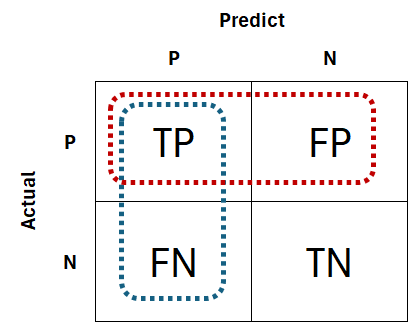

We will more understand this by taking example of Corona virus. Now lab tested all 100 and 50 of them are positive and 50 of them are negative based on prediction and lab test. Now consider following cases:
1. By symptoms, some of them appeared to be positive (Predicted) and lab result also confirmed (Actual) that they are positive i.e. TP.
2. By symptoms, some of them appeared to be negative (Predicted) and lab result also confirmed (Actual) that they are negative i.e. TN
3. By symptoms, some of them actually positive (Predicted) but lab result confirmed (Actual) that they are negative i.e. FN
4. By symptoms, some of them are actually negative (Predicted) but lab result confirmed (Actual) that they are positive i.e. FP

By using above concept we will try to understand two classification model here:
1. Recall:

    $\frac{TP}{TP+FN} = \frac{TP}{Actual Positive}$ here let's say 50 were total tested as positive and among them 30 is correctly diagnosted and actually proven to be positive.

    So, 30 / 50 = 0.6

2. Precision

    $\frac{TP}{TP+FP} = \frac{TP}{Predicted Positive}$, here let's say 60 were predicted positive, and among how many was actually found positive.

    So, 60 / 50 = 1.2


**Explanation 2**

Take some data points as oranges and apples and create models to identify each of them. In below image, you can observe we have two classification oranges and apples and your data points are spread across. 


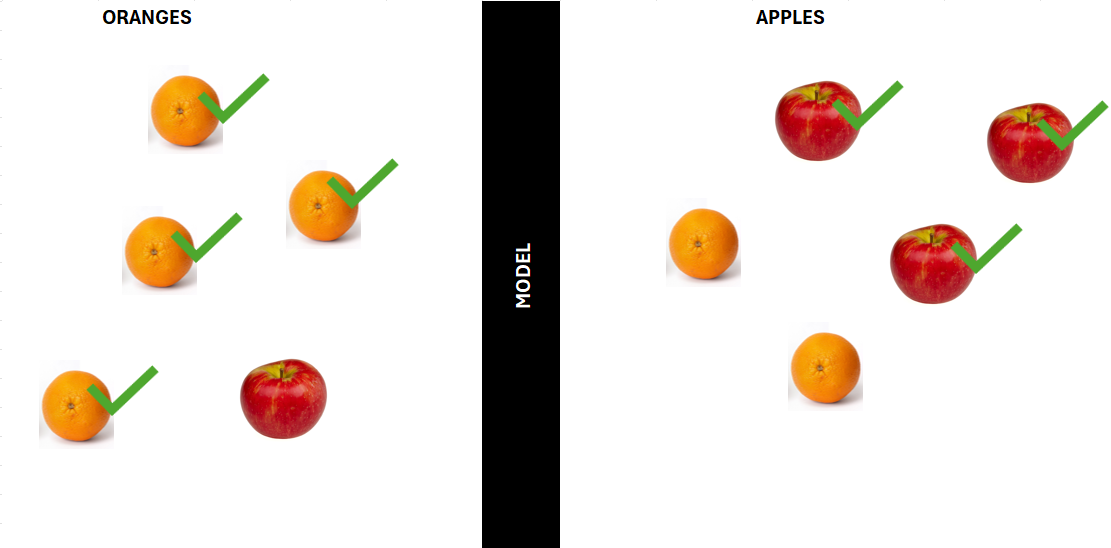


$Accuracy = \frac{7}{10} = 0.7 = 70\%$

Here the accuracy calculation is 7 / 10 = 0.7 (here 7 is correct observation among total 10 observations), but this won't be correct anymore when there is imbalance of quantity, like 990 oranges and 10 apples. That's why we use Recall and Precision.

**Explanation 3**

In below image, let's say we have some images and model needs to identify dog image. Since it is prediction of dog, so we are going ignore 'No Dog' predictions for a moment and observe rest of them. 

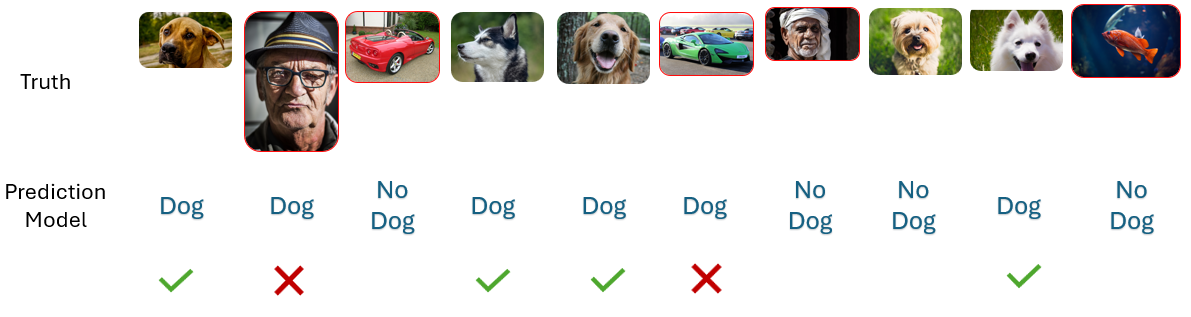

Remaining predictions now we names as positive class and we will try to find out how many of them are correct prediction (True Positive) and result here looks like is:

$True Positive = 4$ and $False Positive = 2$ because in 2 cases, it was wrong prediction.

Now consider other case in below image:

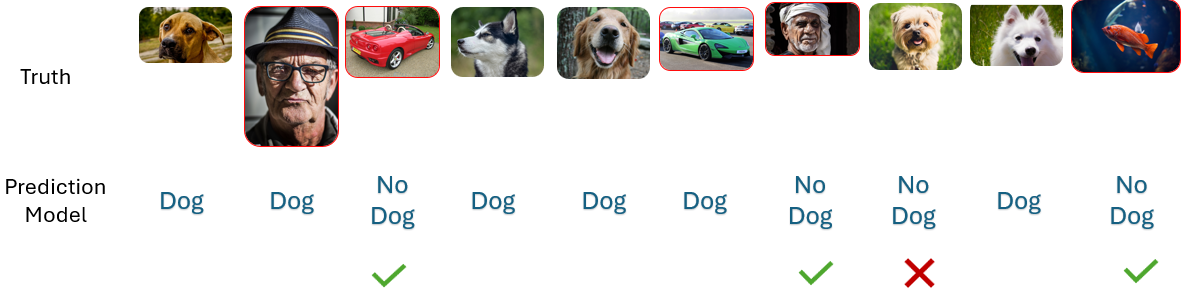

Now consider prediction of "No Dog" case, here 3 predictions are correct because they are not a dog image but one was wrong because it is actually a fish. So our result will be present like this:

$True Negative = 3$ and $False Negative = 1$.

So how many predictions we got right? That we can find out by classification matrix called Precision and Callout. So here precision can be calculated as $True Positive/total observation$. So in Dog prediction case, we find $Precision = 4 / 6 = 66.66\%$

Now **Recall** is slightly different here. So we are going to consider all dog samples and how many of them were correct, gives us a Recall classification. So this is going to represent this way. Total dog truth sample was 5 and 4 were correct. so $Recall = 4 / 5 = 80\% and in this case both our Precision and Recall are same.

Now can easily find out another classification called F1 Score which is $2 \times \frac{precision \times recall}{precision + recall}$


In [5]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [31]:
truth =      ["Dog","Not a dog","Not a dog","Dog", "Dog", "Not a dog", "Not a dog", "Dog","Dog", "Not a dog"]
prediction = ["Dog","Dog","Not a dog","Dog","Dog", "Dog", "Not a dog", "Not a dog", "Dog", "Not a dog"]

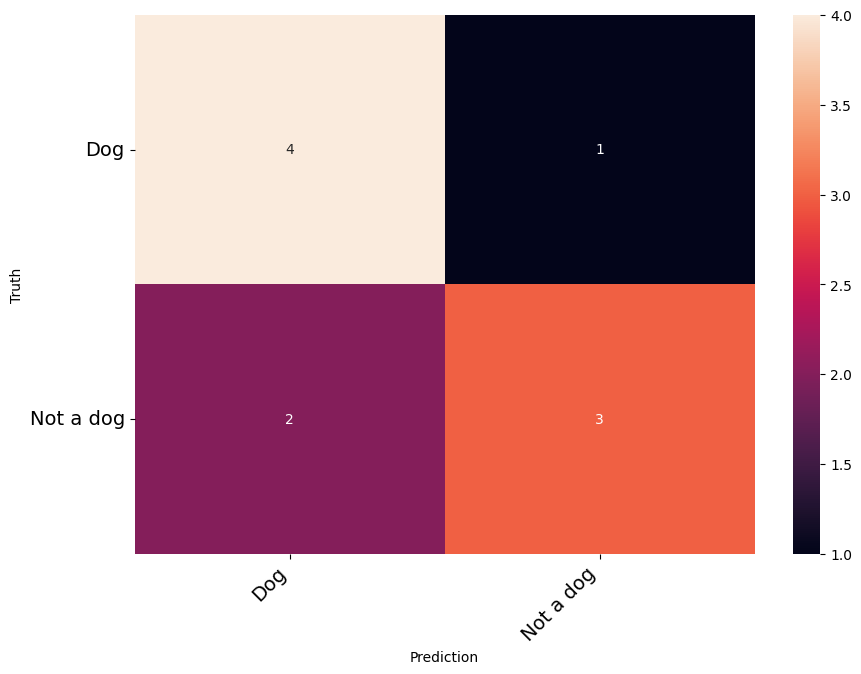

In [32]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Dog","Not a dog"])

### Inter Quartile Range (IQR)
Let's say you have a data distribution from 0 to 100 which can be equaly divided into 4 parts, on scale like below
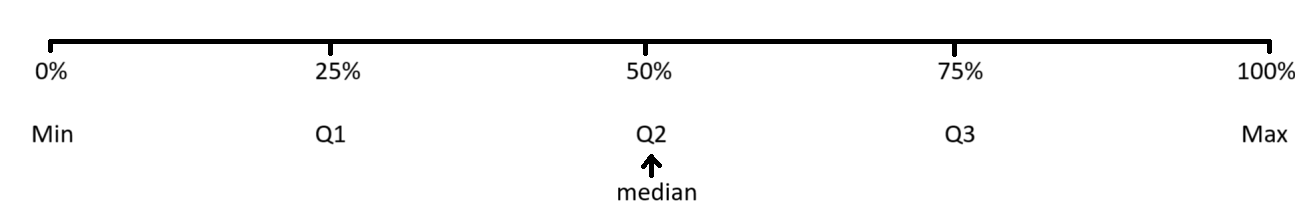

You can find IQR by following equation
$IQR = Q3 - Q1$

In the above distribution, Q2 is median as it's placed just in middle called median, and left and right called Q1 & Q3 respectively. By having small margin (1.5) before and after you can get the safe range and any output going of the range called outliers:

$outliers = Q1-[1.5\times IQR],  Q3 + [1.5\times IQR]$

In [4]:
idata = [0, 1, 20, 21, 22, 23, 24, 25, 30, 90, 100]
arr_range = np.percentile(idata, [25, 50, 75, 100])

#lower_limit = arr_range[0] - 1.5 * (arr_range[2] - arr_range[0])

outliers = []
print(arr_range)

23.0
[ 20.5  23.   27.5 100. ]


## Regression

	1. Linear Regression
	2. Logistic Regression

Before continue we need to understand what is regression analysis. Let’s discuss this topic for a bit. Regression analysis consist of two type of variables:

	a). Dependent Variable
	b). Independent Variable
	
To understand above, it is better to go through some examples. Let’s say if you want to find out the net profit of company sales. Then to determine profit depends on many factors for ex.

	- Employee Salary
	- Infrastructure cost
	- Raw Materials
	- Etc.

As you can see finding profit, you have considered all those which can be referred as independent variable which determines the dependent variable here in this case if Profit
Now if you want to establish a relationship between dependent and independent variable then that is called regression analysis only when if the output is numerical value.
Now let’s understand the Linear Regression.

## Linear Regression

Linear Regression again has two same variable types, and dependent variables are continuous in nature and established relationships between those variables are in linear form. Like you can see in below diagram. In linear regression model, when x increases then y also increases. Now how you can identify relationships? You can see the dots around the line which is basically representing data. 

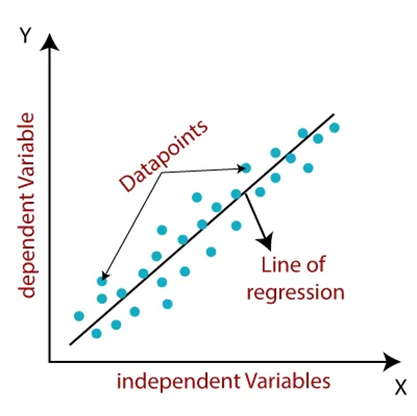

This Linear regression can be categorized in two ways:

a). **Simple Linear Equation**: In case of only one independent variable (or factor or feature) to identify dependent variable 

y=α<sub>0</sub> + α<sub>1</sub>x<sub>1</sub> 

y= c+ mx (simple form of above equation, here m is slop in plot and c is intercept)

b.) **Multiple Linear Equation**: What if we need to find annual sales with multiple factors? In case of multiple independent variables (or factor or feature) to find dependent variable then it is called Multiple Linear Equation. The equation is so simple to apply alpha and x multiple repetitions:

y= α<sub>0</sub> + α<sub>1</sub>x<sub>1</sub> + α<sub>2</sub>x<sub>2</sub> + … + α<sub>m</sub>x<sub>m</sub>  

In the above equation α (alpha) is called regression coefficients, x<sub>i</sub> is called independent variable and y is dependent variable.
What alpha is doing here. Let’s put some numbers in place of alpha to understand this.

y=0.9+1.2x<sub>1</sub>+2x<sub>2</sub>+4x<sub>3</sub>+1x<sub>4</sub>

When alpha value attached with your feature, then highest values shows the importance of feature here. In above equation x<sub>3</sub> is a important feature as alpha value is highest among all i.e. 4 and others are less important.
Now question is, where this alpha comes from? so alpha values come from your training process. When you input your dataset and uses that dataset, algo. Uses to replace alpha values to identify which one is most effective. So it is decided during training phase. 

In [16]:
sales_data = {
    "budget":[9.36,5.26,10.50,9.35,9.2,7.67],
    "Sales":[75.25, 43.48,73.82,73.05,65.38,52.07]
}

In [22]:
df = pd.DataFrame(sales_data)

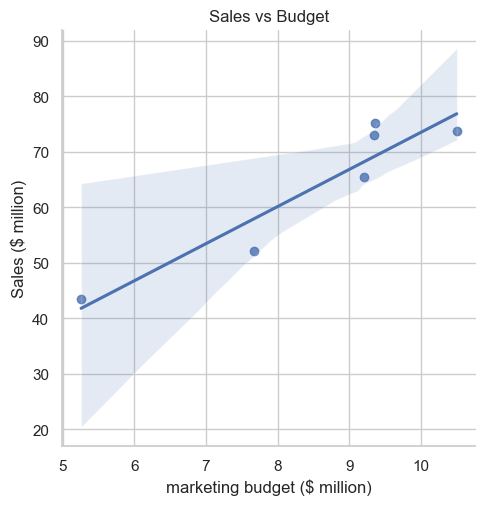

In [51]:
sns.set_theme(style="whitegrid")
sns.lmplot(x="budget", y="Sales", data=df)
plt.title("Sales vs Budget")
plt.xlabel("marketing budget ($ million)")
plt.ylabel("Sales ($ million)")
plt.show()

When I was trying to draw a scatter plot then I was wondering, how I can draw regression line by my own instead of library provide me automatically. Then I see more videos and study material and with that knowledge, I'm trying explain here. Taking example of sales_data set here and we need to find out y = c + mx or y = a + bx

In [25]:
total_element = df["budget"].count()
sum_x = df["budget"].sum()
sum_y = df["Sales"].sum()
sum_x2 = (df["budget"]**2).sum()
sum_y2 = (df["Sales"]**2).sum()
sum_xy = (df["budget"]*df["Sales"]).sum()

#now find b and a
b = (total_element*sum_xy - sum_x*sum_y)/(total_element*sum_x2 - sum_x**2)
a = (sum_y - b*sum_x)/total_element

#now find the predicted value, so what would be my sales if my budget is 8  
x = 8

y = a + b*x

print(y)

60.121283558549784


## Logistic Regression

We have seen linear regression where it works on continuous data (numerical data set), Logistic works with categorical data, example if your output is Yes/No, True/False etc. 
If you dataset contains this kind of data then logistic regression is good choice to use. The equation of this would be

$\sum_{n=1}^{10} n^2$

Take an example of dataset:

In [52]:
data = {
    "score":[45.6,33.1,83.6,53.2,32.8,26.7,98.1,78.6,69.0,49.9,11.40,52.8, 81.7,31.5],
    "result":["Pass","Fail","Pass","Pass","Fail","Fail","Pass","Pass","Pass","Pass","Fail","Pass","Pass","Fail"]
}

In [53]:
import pandas as pd

In [57]:
df = pd.DataFrame(data)
df.head(14)


,score,result
0,45.6,Pass
1,33.1,Fail
2,83.6,Pass
3,53.2,Pass
4,32.8,Fail
5,26.7,Fail
6,98.1,Pass
7,78.6,Pass
8,69.0,Pass
9,49.9,Pass


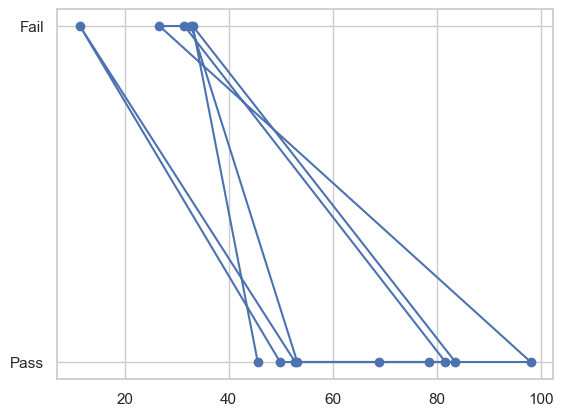

In [63]:
plt.scatter(df["score"],df["result"])
plt.plot(df[["score"]],df["result"])


When you use linear regression on above dataset, then you will not get hyper plane way off than than the actual. So whenever we have categorical data, it is always good to use Logistic Regression.

### Where is best use case of logistic regression
1. Fraud Detection
2. Disease Diagnosis
3. Mail is SPAM or NOSPAM

In [ ]:
# create and fit the logistic regression model
model = lg()
model.fit(df["score"],df["result"])

LogisticRegression()

In [ ]:
#generate predictions for the plot
x_test = np.linspace(df["score"].min(),df["score"].max()).reshape(-1,1)
y_pred = model.predict_proba(x_test)[:,-1]
print(y_pred)

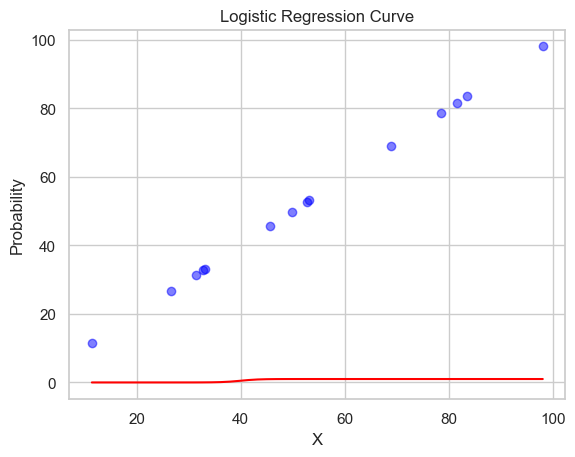

In [78]:
plt.scatter(df["score"], df["score"], color='blue', alpha=0.5) 
plt.plot(x_test, y_pred, color='red') 
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.show()

In the logistic regression, result is always stays between 0 and 1, there would not be any situation when you see those result in out of range which generally classified by class (ex. class 0 or 1, A or B etc.). If you related this is also probablistic results. Since it's probablistic result, then we need to convert our independent variables to the probablity expression with the help of **Sigmoid** function. In other words, sigmoid function converts the independent variable to probablistic value with respect of dependent variable. The equation of Sigmoid function is:

## $y=\frac{1}{1+e^{-x}}$ 

here as described earlier x is independent variable and e denotes to euler constants which is equal to 2.718

In [80]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

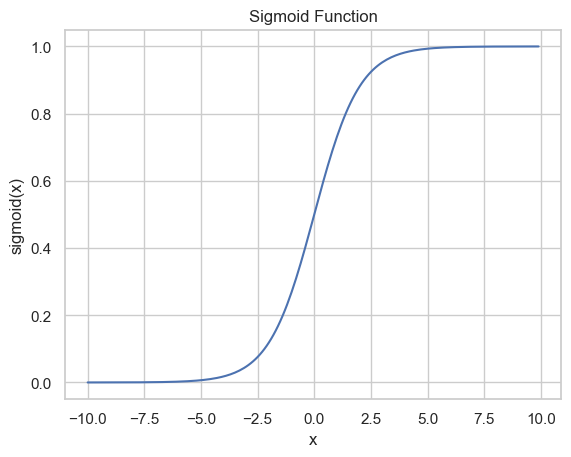

In [93]:
values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()